In [ ]:
# Red Neuronal Programada en colab:
# https://colab.research.google.com/drive/1ooqx9lIkxQodgfCiV6z7AdH3PWxOL2WI?usp=sharing
import numpy as np #procesamiento numerico
import scipy as sc #expande funcionalidad de numpy
import matplotlib.pyplot as plt #para graficar

from sklearn.datasets import make_circles

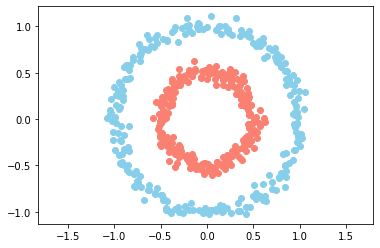

In [ ]:
#CREAR DATASET

n = 500 #n° de registros que tenemos en los datos
p = 2 # N° caracteristicas en los datos

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05 ) # x = input; y= output
# Eje X se tiene el data set que se esta utilizando (los puntos d el grafico mas abajo)
#print(Y)
# Eje Y = vector binario, indica a cual de los circulos pertenese cada dato
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0]==0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0]==1,1], c = "salmon")
plt.axis("equal")
plt.show()


In [ ]:
#CLASE DE LA CAPA DE LA RED

class neural_layer():
  #estructura de datos que contiene la info y parametros de la red neuronal
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1



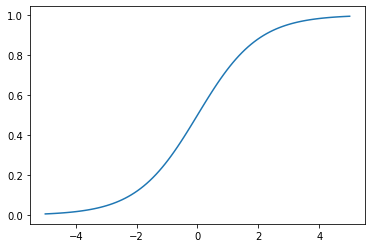

In [ ]:
#FUNCION DE  ACTIVACION 
sigm = (lambda x: 1/(1 + np.e ** (-x)),   #funcion sigmoide
        lambda x: x*(1 - x))              #derivada de la FS

relu = lambda x: np.maximum(0, x)


_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x)) #al variar el indice entre 0 y 1 se puede visualizar la fs o su derivada


In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...

def create_nn (topology, act_f):

  nn = []

  for l,layer in enumerate(topology[:-1]): 
    nn.append(neural_layer(topology[l],topology[l+1],act_f))

  return nn


In [ ]:
topology = [p, 4, 8, 1] #numeor de neuronas

neural_net = create_nn(topology, sigm)

l2_cost =  (lambda Yp, Yr: np.mean((Yp-Yr)**2),
            lambda Yp, Yr: (Yp-Yr))



def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True): #codigo q se encarga de entrenar la red neuronal
  out = [(None,X)]

  #Forward pass
  for l,layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[1].act_f[0](z)

    out.append((z,a))

  if train:
    #Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]

      if (l == len(neural_net)-1):
        #calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a,Y) * neural_net[l].act_f[1](a))
      else:
        #calcular delta respecto a la capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W

      #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net,X,Y,l2_cost, 0.5)




array([[0.28005273],
       [0.32075451],
       [0.28621689],
       [0.28963551],
       [0.310091  ],
       [0.28549972],
       [0.27839993],
       [0.29899068],
       [0.28805179],
       [0.30916063],
       [0.30238726],
       [0.28092551],
       [0.29865131],
       [0.32236861],
       [0.29312732],
       [0.29247309],
       [0.30461373],
       [0.30813075],
       [0.29020664],
       [0.2883365 ],
       [0.28959567],
       [0.29690552],
       [0.30981608],
       [0.31097097],
       [0.30496122],
       [0.310243  ],
       [0.28704951],
       [0.30696553],
       [0.32329052],
       [0.32325013],
       [0.31603313],
       [0.2868045 ],
       [0.30673836],
       [0.28197136],
       [0.28889088],
       [0.30253156],
       [0.2912627 ],
       [0.30592796],
       [0.2767387 ],
       [0.29227691],
       [0.31104502],
       [0.28827032],
       [0.29450991],
       [0.28428153],
       [0.30203104],
       [0.30025816],
       [0.27578351],
       [0.292

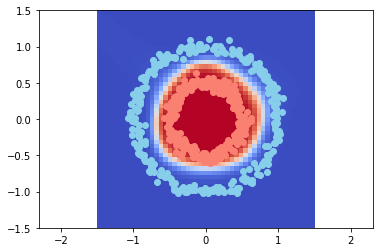

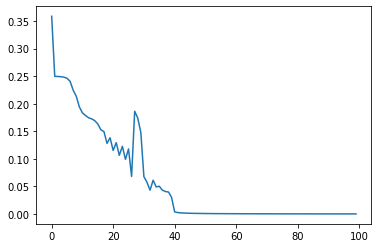

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  #entrenando al red
  pY = train(neural_n, X, Y, l2_cost,lr=0.05)

  if i % 25 == 0:
    print(pY)

    loss.append(l2_cost[0](pY,Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0,x1]]),Y,l2_cost,train = False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c = "skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c = "salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


